<p hidden>$
\newcommand{\phm}{\phantom{-}}
\newcommand{\vb}{\underline{\mathbf{b}}}
\newcommand{\vf}{\underline{\mathbf{f}}}
\newcommand{\vk}{\underline{\mathbf{k}}}
\newcommand{\vx}{\underline{\mathbf{x}}}
\newcommand{\vy}{\underline{\mathbf{y}}}
\newcommand{\deriv}[3][]{\frac{\mathrm{d}^{#1}#2}{\mathrm{d}#3^{#1}}}
\newcommand{\partderiv}[3][]{\frac{\partial^{#1}#2}{\partial#3^{#1}}}
\newcommand{\intd}{\,\mathrm{d}}
\newcommand{\rmd}{\mathrm{d}}
\DeclareMathOperator{\Uniform}{Uniform}
\DeclareMathOperator{\Poisson}{Poisson}
\DeclareMathOperator{\Normal}{Normal}
\DeclareMathOperator{\Exponential}{Exponential}
\DeclareMathOperator{\GammaDist}{Gamma}
\DeclareMathOperator{\Prob}{P}
\DeclareMathOperator{\Exp}{E}
\DeclareMathOperator{\Var}{Var}
$</p>

# Lab 6: ODEs and Initial Value Problems

### Topics

- **Mathematics:** Euler and simple Runge–Kutta methods; errors and step sizes.
- **Python:** using functions as input arguments for other functions; using scipy's ODE solver `RK23`.

In [1]:
import math #math.ceil returns int, but numpy.ceil returns float
import matplotlib.pyplot as plt
import numpy as np

from scipy import integrate

%matplotlib notebook

np.set_printoptions(edgeitems=5, linewidth=100000, precision=2)


def expand(x, s=0.05, d=0):
    """Expand a two element array about its center point by a relative scale or a fixed offset.
    Args:
        x (list|np.array): two element array
        s (float): relative scale to expand array based on its width x[1] - x[0]
        d (float): fixed offset to expand array
    Returns:
        x (np.array): expanded two element array
    """
    x = np.array(x)
    d = d + s * (x[1] - x[0])
    return x + np.array([-d, d])

help(expand)

Help on function expand in module __main__:

expand(x, s=0.05, d=0)
    Expand a two element array about its center point by a relative scale or a fixed offset.
    Args:
        x (list|np.array): two element array
        s (float): relative scale to expand array based on its width x[1] - x[0]
        d (float): fixed offset to expand array
    Returns:
        x (np.array): expanded two element array



## Preparation

Read your lecture notes. See also Chapra and Canale's chapter on Runge-Kutta methods.  In the first part of this lab you will work through some of the exercises from this chapter.

You will need an extra function for this lab session. The `euler` function below solves the initial value problem

$$
  \deriv{y}{t} = f(t, y), \quad y(t_0) = y_0
$$

using Euler's method.

Read the function below to see how the function should be used.

In [2]:
def euler(fun, y0, t_span, h):
    """Solves a single ordinary differential equation using Euler's method.
    
    Args:
        fun (callable): computes the derivative of y at t using fun(t, y)
        y0 (np.ndarray): initial condition on y (can be a vector)
        t_span (tuple): interval of integration (t0, tf)
        h (float): step size
    Returns:
        t (np.ndarray): array containing the value of t at each time point in [t0, tf]
        y (np.ndarray): array containing the value of y at each time point in [t0, tf]
    """

    y0 = np.array(y0).reshape(-1)

    n = math.ceil((t_span[1] - t_span[0]) / h) + 1
    t = np.linspace(t_span[0], t_span[1], n)
    y = np.zeros((len(t), len(y0)))

    y[0] = y0.flatten()
    for i in range(0, len(t) - 1):
        t[i + 1] = t[i] + h
        y[i + 1] = y[i] + h * fun(t[i], y[i])
    
    return t, y

help(euler)

Help on function euler in module __main__:

euler(fun, y0, t_span, h)
    Solves a single ordinary differential equation using Euler's method.
    
    Args:
        fun (callable): computes the derivative of y at t using fun(t, y)
        y0 (np.ndarray): initial condition on y (can be a vector)
        t_span (tuple): interval of integration (t0, tf)
        h (float): step size
    Returns:
        t (np.ndarray): array containing the value of t at each time point in [t0, tf]
        y (np.ndarray): array containing the value of y at each time point in [t0, tf]



## Review
Python functions can take other functions as inputs. We want to make a general Euler's method function that was can use to solve any differential equation, this will mean that we don't have to write custom code to carry out Euler's method separately for each differential equation that we want to solve. In this case, the first argument of the `euler` function allows us to pass a function that calculates our right hand side $f(t, y)$.

You can define functions using `def fun(t, y):` or `lambda t, y: ...`.

For example, for the right hand side $f(t, y) = t^2 y - 1.2 y$
```
def fun(t, y):
    return t**2 * y - 1.2 * y
```
and
```
fun = lambda t, y: t**2 * y - 1.2 * y
```
both define a function `fun` that can be passed to `euler`.

Define `fun` in the cell below and check that it evaluates $f(t, y)$ correctly (to within machine precision).

In [66]:
fun = lambda t, y: t**2 * y - 1.2 * y
fun(0, 1)

-1.2

## Euler's method
In this part of the lab, you will use Euler's method to solve the initial value problem

$$
  \deriv{y}{t} = t^2 y - 1.1 y, \quad y(0) = 1
$$

and look at how reducing the step size affects the errors.

#### Tasks

1. Solve the problem analytically to find the exact solution $y(t)$. Note that the differential equation is first order, separable, and should integrate easily.

2. Use `euler` with step sizes of $h = 0.5$ and $h = 0.25$ to solve the above initial value problem numerically over the interval from $t=  0$ to $t = 2$.

3. Plot all three solutions on the same graph: the exact solution $y(t)$, your approximate solution for $h = 0.5$, and your approximate solution for $h = 0.25$.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>
    
  What happens to the error in the numerical approximation as you reduce the step size?
</div>

<IPython.core.display.Javascript object>


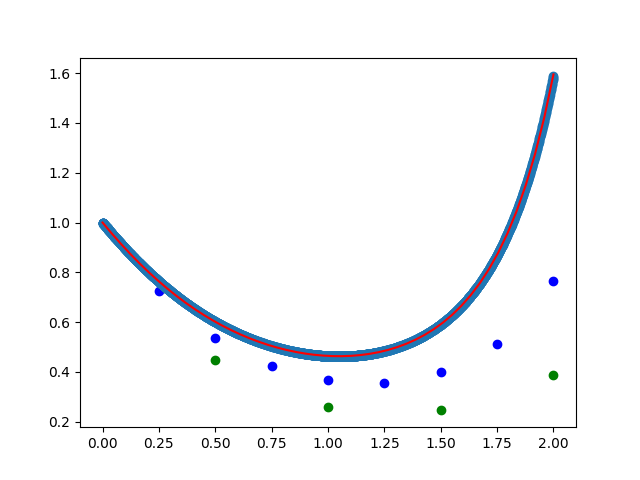

In [79]:
fun = lambda t, y: t**2 * y - 1.1 * y
# Analytically, y = e**((t**3)/3 - 1.1*t)
t_span = (0, 2)
y0 = 1
fig, ax = plt.subplots()

t, y_big_step = euler(fun, y0, t_span, 0.5)
ax.plot(t, y_big_step, 'go')

t, y_small_step = euler(fun, y0, t_span, 0.25)
ax.plot(t, y_small_step, 'bo')

t, y_really_small_step = euler(fun, y0, t_span, 0.001)
ax.plot(t, y_really_small_step, 'o')

t = np.linspace(0, 2)
y_actual = np.exp((t**3)/3-1.1*t)
ax.plot(t, y_actual, 'r')

# The error term in the numerical approximation decreases as we reduce the step size. This is because, from Taylor 
# Series, the error is O(h)

## Heun's method, a second order Runge–Kutta method

You will now modify the code of Euler's method so that it carries out Heun's method for solving initial value problems.

To calculate $y_{i+1}$ from $y_i$, Heun's method uses the following steps:

<table>
    <tr style="background-color: white; height:34px">
        <td style="text-align: left">$k_1 =  f(t_i, y_i)$</td>
        <td style="text-align: left">get the slope at the current point</td>
    </tr>
    <tr style="background-color: white; height:34px">
        <td style="text-align: left">$k_2 =  f(t_i + h, y_i + h k_1)$</td>
        <td style="text-align: left">estimate the slope at the next point based on Euler's method</td>
    </tr>
    <tr style="background-color: white; height:34px">
        <td style="text-align: left">$y_{i+1} =  y_i + h\left(\frac{1}{2} k_1 + \frac{1}{2} k_2\right)$</td>
        <td style="text-align: left">use the average slope to get a better estimate</td>
    </tr>
</table>

#### Tasks

1. Make a copy of `euler`, rename it `heun`, and modify the function to compute Heun's method instead.
2. Use `heun` with step sizes of $h = 0.5$ and $h = 0.25$ to solve the above initial value problem numerically over the interval from $t = 0$ to $t = 2$.
3. Plot all three solutions on the same graph: the exact solution $y(t)$, your approximate solution for $h = 0.5$, and your approximate solution for $h = 0.25$.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 2</h3>

  What happens to the error in the numerical approximation as you reduce the step size? How does Heun's method compare to Euler's method?
</div>

<IPython.core.display.Javascript object>


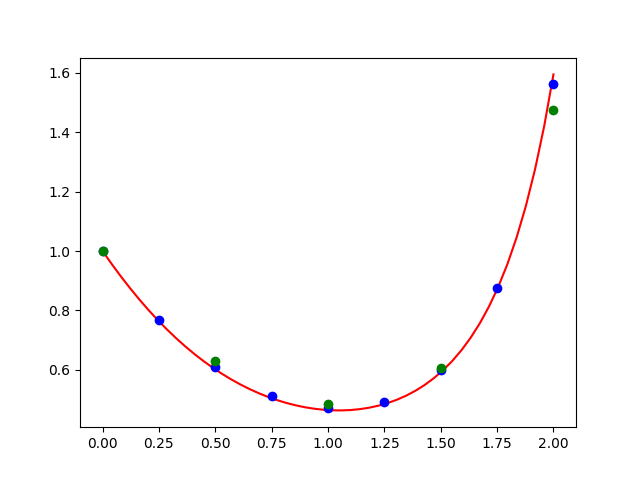

In [75]:
def heun(fun, y0, t_span, h):
    """Solves a single ordinary differential equation using Huen's method.
    
    Args:
        fun (callable): computes the derivative of y at t using fun(t, y)
        y0 (np.ndarray): initial condition on y (can be a vector)
        t_span (tuple): interval of integration (t0, tf)
        h (float): step size
    Returns:
        t (np.ndarray): array containing the value of t at each time point in [t0, tf]
        y (np.ndarray): array containing the value of y at each time point in [t0, tf]
    """

    y0 = np.array(y0).reshape(-1)

    n = math.ceil((t_span[1] - t_span[0]) / h) + 1
    t = np.linspace(t_span[0], t_span[1], n)
    y = np.zeros((len(t), len(y0)))

    y[0] = y0.flatten()
    for i in range(0, len(t) - 1):
        k_1 = fun(t[i], y[i])
        k_2 = fun(t[i] + h, y[i]+h*k_1)
        t[i + 1] = t[i] + h
        y[i + 1] = y[i] + h * (1/2 * k_1 + 1/2 * k_2)
    
    return t, y

fun = lambda t, y: t**2 * y - 1.1 * y
# Analytically, y = e**(t**3/3 - 1.1*t)
t_span = (0, 2)
y0 = 1
fig, ax = plt.subplots()


t = np.linspace(0, 2)
y_actual = np.exp((t**3)/3-1.1*t)
ax.plot(t, y_actual, 'r')

t, y_small_step = heun(fun, y0, t_span, 0.25)
ax.plot(t, y_small_step, 'bo')

t, y_small_step = heun(fun, y0, t_span, 0.50)
ax.plot(t, y_small_step, 'go')

# The error is decreasing as step size decreases. This is because the size of the error is O(h**2). Because this is 
# a second order method(h**2), the error is smaller than Euler's method and so Heun's is more accurate.

## RK23, an adaptive Runge-Kutta method of order 3(2)

Python's scipy package provides access to a selection of ODE solvers such as the adaptive Runge-Kutta methods `RK23` and `RK45`.

These numerical integrators are made accessible by `scipy.integrate.solve_ivp` and you can find more information about the solvers and some code examples in the [API](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

#### Tasks

1. Use `scipy.integration.solve_ivp` with the method `RK23` to solve the above initial value problem numerically with an initial step size of $h=0.25$ over the interval from $t = 0$ to $t = 2$.
2. Plot the exact solution $y(t)$ and the solution from `RK23`.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>

  What happens to the step size over the interval? How does <code>RK23</code> compare to Heun's method?
 
  What is the order of the <code>RK23</code> method?
</div>

<IPython.core.display.Javascript object>


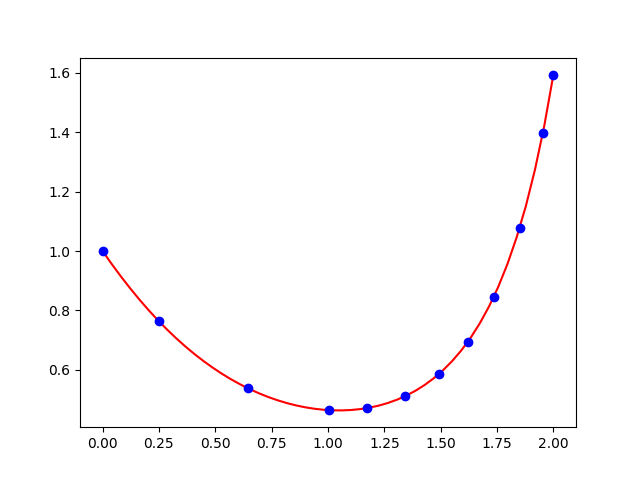

The order of RK23 is 3


In [87]:
fun = lambda t, y: t**2 * y - 1.1 * y
# Analytically, y = e**(t**3/3 - 1.1*t)
t_span = (0, 2)
y0 = [1]
fig, ax = plt.subplots()


t = np.linspace(0, 2)
y_actual = np.exp((t**3)/3-1.1*t)
ax.plot(t, y_actual, 'r')

#t, y_small_step = heun(fun, y0, t_span, 0.25)
#ax.plot(t, y_small_step, 'g')

#t, y_small_step = heun(fun, y0, t_span, 0.25)
#ax.plot(t, y_small_step, 'go')

soln = integrate.solve_ivp(fun, [0, 2], y0, method='RK23', first_step=0.25)
t, y = soln.t, soln.y[0]
ax.plot(t, y, 'bo')


# The stepsize of RK23 is decreasing over time. Having the adaptive stepsize increases
# the order by 1. The error is smaller than Heuns as it is a third order method. 
print(f"The order of RK23 is {integrate.RK23.order}")

## Comparing Heun's method and RK23

In a simple model of a chemical reaction, the temperature $T$ of the system at time $t$ is governed by two factors: the energy being produced by the reaction, and energy being lost to the surroundings by convection.

An energy balance gives the following differential equation for $T(t)$,

$$
  \deriv{T}{t} = A \exp\left(-\frac{E}{RT}\right) - k (T - T_a)
$$

where

- $A$ is the rate of the reaction,
- $E$ is the activation energy (the minimum energy needed for the reaction to occur),
- $R$ is the gas constant,
- $T$ is the temperature (measured in Kelvin),
- $k$ is a Newtonian cooling constant, and
- $T_a$ is the ambient temperature, the temperature of the surroundings (also in Kelvin).

The first term on the right-hand side is called the Arrhenius term (after the first person to make an in-depth study of the effect of temperature on the rate of reactions).  This term comes from looking at the probability of atoms in the system colliding with one another.  The second term on the right-hand side represents Newtonian cooling, where an object cools at a rate proportional to its temperature difference with its surroundings.

In this part of the lab, you will solve this differential equation with the following values:

$$
A = 30{,}000 \, \mathrm{K}\mathrm{s}^{-1} \quad E = 24{,}900 \, \mathrm{J} \quad R = 8.3 \, \mathrm{J}\mathrm{K}^{-1} \quad k = 1 \mathrm{s}^{-1} \quad T_a = 300 \, \mathrm{K}
$$

and initial condition $T(0) = 700 \, \mathrm{K}$.

1. Write a function `fun(t, T)` for the right-hand side of the ODE. Note that while the right-hand side does not depend on $t$ directly you still need to include it as an argument as this is how the function is called by `heun` and `scipy.integration.solve_ivp`.
2. Use Heun's method with a step size of $h = 0.5$ to solve for $T(0)$ over the interval from $t = 0$ to $t = 10$.
3. Use `scipy.integration.solve_ivp` with `RK23` to solve for $T(0)$ with an initial step size of $h=0.25$ over the interval from $t = 0$ to $t = 2$.
4. Plot your two estimates for $T(t)$ on the same diagram. Use a marker style that allows you to see the *points* the solvers have calculated.

**Hint:** All solutions should eventually converge to a constant value around $27{,}150 \, \mathrm{K}$.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 4</h3>

  How well does your solution using Heun's method compare to the adaptive Runge-Kutta method <code>RK23</code>? What could you do to improve their alignment?

  Describe how the physical system behaves over the interval.

  How does the adaptive Runge-Kutta method <code>RK23</code> deal with the behaviour of underlying system differently from Heun's method?
</div>

<IPython.core.display.Javascript object>


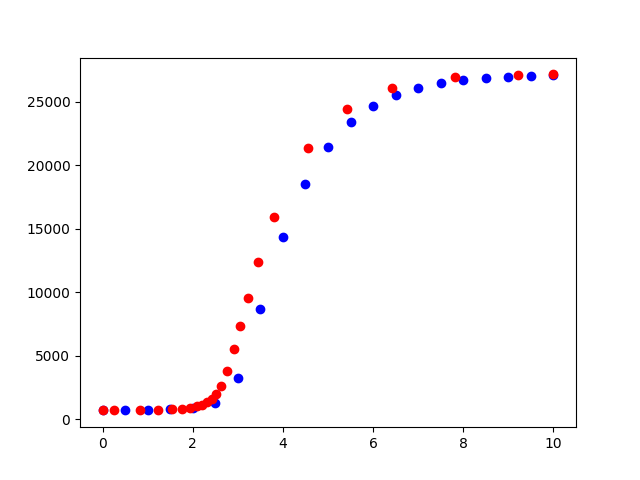

In [94]:
# To improve alignment, we could have our Heuns method use a adaptive stepsize.

# The system for the first 3 seconds slowly increases temperature. From 3 to 6, the temperature increases quickly,
# before slowing down to converge at around 27150k.

# The adaptive Runge Kutta method has a small step size around the quick ascent at the interval [2, 4], which allows
# for more accuracy around the ascent. Heun's method does not have an adaptive stepsize, so it can not as accurately
# plot the ascent as RK23. 

A = 30000.
E = 24900.
R = 8.3
k = 1.
T_a = 300.

fig, ax = plt.subplots()
fun = lambda t, T: A*np.exp(-E/(R*T)) - k*(T-T_a)
t_span = (0, 10)
y0 = 700

t, y_small_step = heun(fun, y0, t_span, 0.5)
ax.plot(t, y_small_step, 'bo')

y0 = [700]
soln = integrate.solve_ivp(fun, t_span, y0, method='RK23', first_step=0.25)
t, y = soln.t, soln.y[0]

ax.plot(t, y, 'ro')
#ax.set_xlim(0, 2)
#ax.set_ylim(0, 2000)